In [2]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the dataset

data=pd.read_csv('hour.csv')

In [6]:
data.shape

(17379, 17)

In [10]:
#To check if there is any null values

data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
#To check duplicate values

duplicate=data[data.duplicated()]
duplicate

#There is no duplicate values

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [17]:
#Sanity check

data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Sanity checks:

Check if registered + casual = cnt for all the records. If not, the row is junk and should be dropped.

Month values should be 1-12 only

Hour values should be 0-23

In [4]:
data['registered']+data['casual']!=data['cnt']

#False indicates all registerd + casual is equal to cnt

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Length: 17379, dtype: bool

In [19]:
np.sum(data['registered']+data['casual']!=data['cnt'])

# 0 indicates there are 0 rows which are unequal

0

In [20]:
#write the code to drop the rows where this cnt is true

data.drop(data[data['registered']+data['casual']!=data['cnt']].index,inplace=True)

In [21]:
#Month values should be 1-12 only

data['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [22]:
#Hour values should be 0 to 23

data['hr'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

The variables ‘casual’ and ‘registered’ are redundant and need to be dropped. ‘Instant’ is the index and needs to be dropped too. The date column dteday will not be used in the model building, and therefore needs to be dropped. Create a new dataframe named inp1

In [4]:
a = ['casual', 'registered', 'dteday', 'instant']
inp1 = data.drop(a, axis=1).copy()


In [27]:
inp1.shape

(17379, 13)

# UNivariate analysis:


In [28]:
#Describe the numerical fields in the dataset using pandas describe method.

inp1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


# Make density plot for temp. This would give a sense of the centrality and the spread of the distribution.

<AxesSubplot:xlabel='temp', ylabel='Density'>

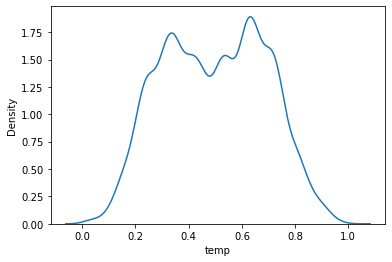

In [29]:
sns.kdeplot(data['temp'])


# Boxplot for atemp 

Are there any outliers?

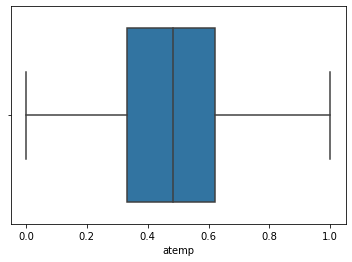

In [8]:
sns.boxplot(inp1.atemp)
plt.show()
import warnings
warnings.filterwarnings('ignore')

# Histogram for hum

Do you detect any abnormally high values?

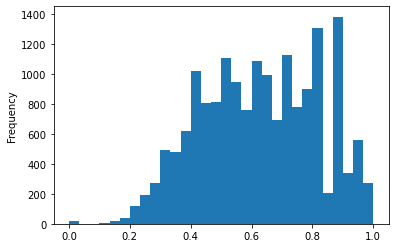

In [5]:
#plot using matplotlib

inp1.hum.plot.hist(bins=30)
plt.show()

#No abnormally high values present

<AxesSubplot:xlabel='hum', ylabel='Count'>

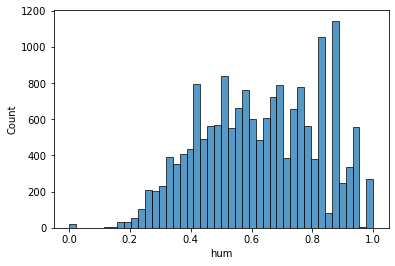

In [38]:
#plot using seaborn
#More structured

sns.histplot(data=inp1.hum)

(array([  23.,   55.,  696., 1481., 2641., 3084., 2940., 2384., 2900.,
        1175.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

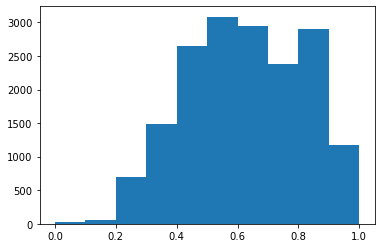

In [42]:
plt.hist(inp1.hum,stacked=True)

# Density plot for windspeed

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

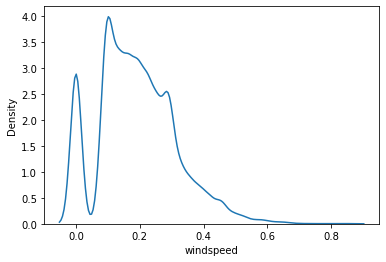

In [44]:
sns.kdeplot(data['windspeed'])

# Box and density plot for cnt – this is the variable of interest 

Do you see any outliers in the boxplot? 

Does the density plot provide a similar insight?

<function matplotlib.pyplot.show(close=None, block=None)>

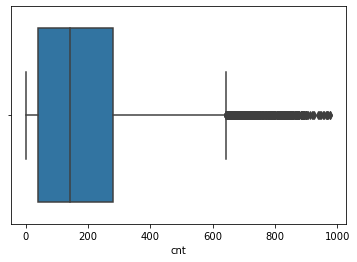

In [46]:
sns.boxplot(inp1.cnt)
plt.show

#Outliers present 

<AxesSubplot:ylabel='Density'>

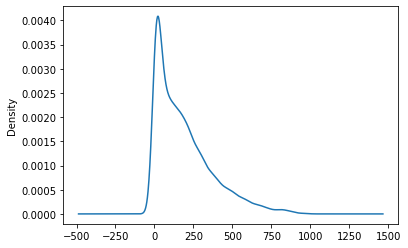

In [50]:
inp1.cnt.plot.density()

#outliers present
#positively skewed

# Outlier treatment:  

Cnt looks like some hours have rather high values. You’ll need to treat these outliers so that they don’t skew the analysis and the model. 

Find out the following percentiles: 10, 25, 50, 75, 90, 95, 99

Decide the cutoff percentile and drop records with values higher than the cutoff. Name the new dataframe as inp2.

In [7]:
#1.5 IQR rule
#Buisness-95%

inp1.cnt.quantile([0.1,0.25,0.5,0.75,0.9,0.95,0.99])

#Since more outliers are present after 600 as we see from the boxplot so the cutoff we decided is 95% whose value is 563.10

0.10      9.00
0.25     40.00
0.50    142.00
0.75    281.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

In [8]:
inp2=inp1[inp1.cnt<563].copy()

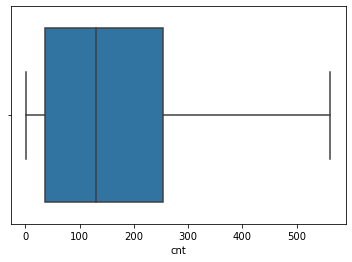

In [58]:
sns.boxplot(inp2.cnt)
plt.show()

# Bivariate analysis

Make boxplot for cnt vs. hour

What kind of pattern do you see?

<AxesSubplot:xlabel='cnt', ylabel='hr'>

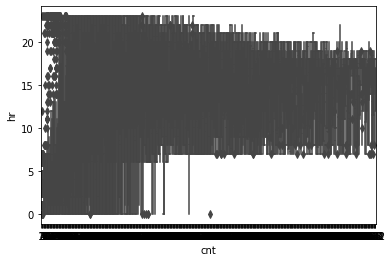

In [61]:
sns.boxplot('cnt','hr',data=inp2)

<AxesSubplot:xlabel='hr', ylabel='cnt'>

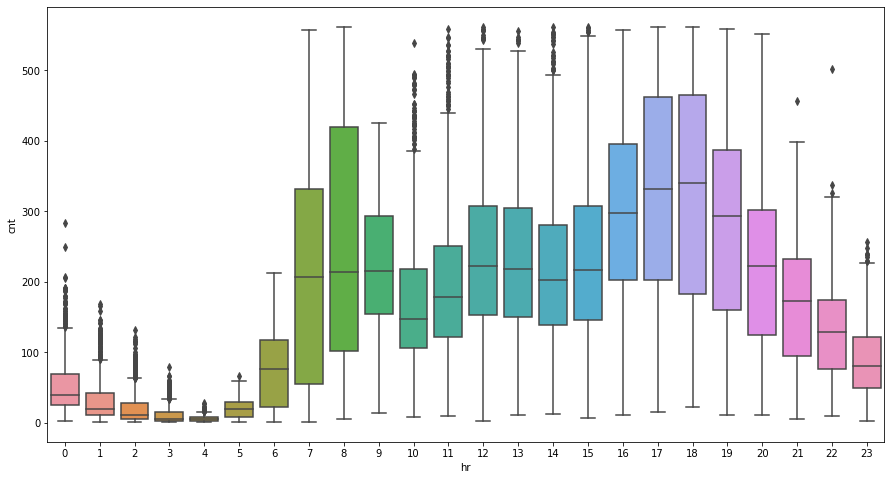

In [66]:
plt.figure(figsize=[15,8])
sns.boxplot('hr','cnt',data=inp2)

#We observe the following
#1) Bike booking peak hours are at 8am and 5pm to 6pm
#2) more outliers are present at 10 am and 11 am

# Make boxplot for cnt vs. weekday

Is there any difference in the rides by days of the week?

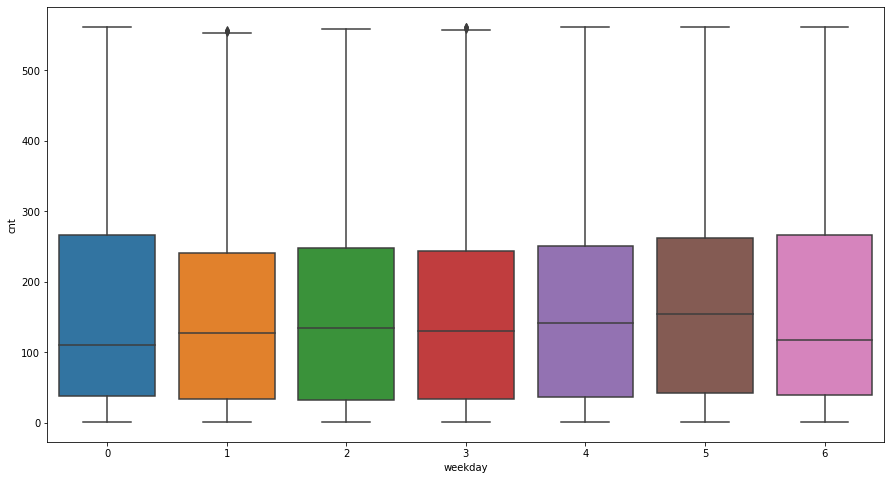

In [13]:
plt.figure(figsize=[15,8])
sns.boxplot("weekday","cnt",data=inp2)

#We observe The following
#not much difference observed
#outliers present in day 1 which Tuesday and day 3 which is thursday

# Make boxplot for cnt vs. month

Look at the median values. Any month(s) that stand out?



<AxesSubplot:xlabel='mnth', ylabel='cnt'>

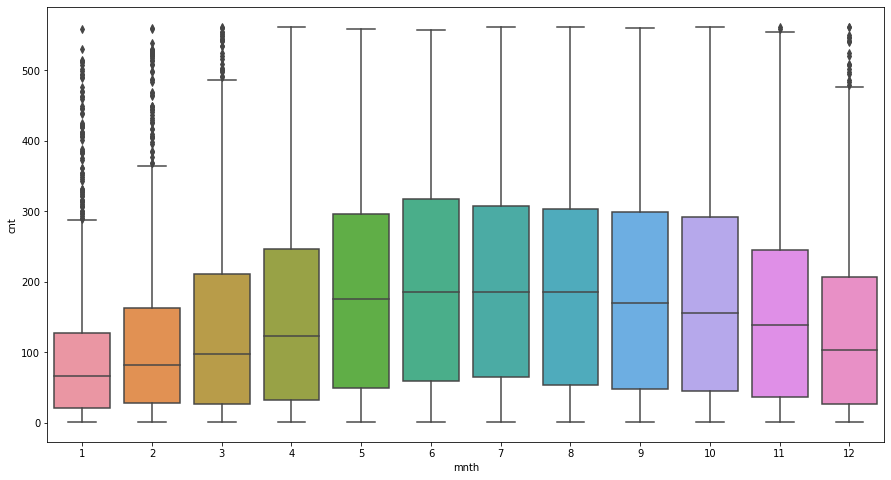

In [68]:
plt.figure(figsize=[15,8])
sns.boxplot("mnth","cnt",data=inp2)

#WE observe the following
#More bookings in 6 and 7 month which june and july
#more outliers in january and february
#6 and 7 month have high median values which approximately equal to 200

# Make boxplot for cnt vs. season

Which season has the highest rides in general? Expected?




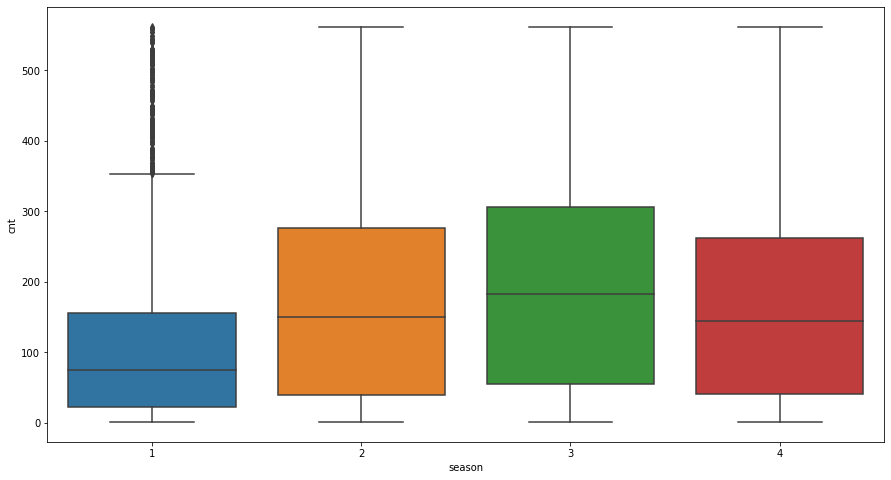

In [20]:
plt.figure(figsize=[15,8])
sns.boxplot("season","cnt",data=inp2)

#1-spring
#2-summer
#3-Fall
#4-winter

#we observe
#more outliers in sprinbg
#more bookings in Fall and summer

# Make a bar plot with the median value of cnt for each hr

Does this paint a different picture from the box plot?

<AxesSubplot:xlabel='hr', ylabel='cnt'>

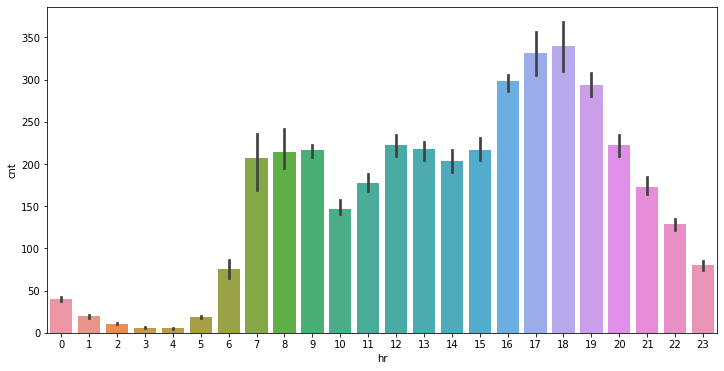

In [23]:
plt.figure(figsize=[12,6])
sns.barplot(x='hr',y='cnt',data = inp2,estimator = np.median)

#More error in 17 18 in barplot 
#erroe-deviation from median

# Make a correlation matrix for variables atemp, temp, hum, and windspeed

Which variables have the highest correlation?

In [74]:
a=['atemp','temp','hum','windspeed']
corrs=inp2[a].corr()
corrs

,atemp,temp,hum,windspeed
atemp,1.000000,0.988218,-0.025747,-0.073985
temp,0.988218,1.000000,-0.042603,-0.033209
hum,-0.025747,-0.042603,1.000000,-0.288648
windspeed,-0.073985,-0.033209,-0.288648,1.000000


<AxesSubplot:>

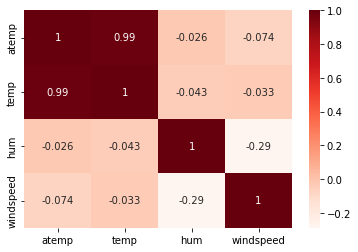

In [76]:
sns.heatmap(corrs,annot=True,cmap='Reds')


# Data preprocessing
Treating mnth column

For values 5,6,7,8,9,10, replace with a single value 5. This is because these have very similar values for cnt.

In [77]:
inp2.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [26]:
inp3=inp2.copy()

In [79]:
inp3.mnth[inp3.mnth.isin([5,6,7,8,9])] = 5

In [81]:
inp3['mnth'].value_counts()

5     6785
12    1455
1     1429
3     1412
11    1392
4     1349
10    1341
2     1339
Name: mnth, dtype: int64

#Get dummies for the updated 6 mnth values
Treating hr column

Create new mapping: 0-5: 0, 11-15: 11; other values are untouched. Again, the bucketing is done in a way that hr values with similar levels of cnt are treated the same.

In [82]:
inp3.hr[inp3.hr.isin([0,1,2,3,4,5])] = 5
inp3.hr[inp3.hr.isin([11,12,13,14,15])] = 11
np.unique(inp3.hr)

array([ 5,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype=int64)

In [83]:
inp3['hr'].value_counts()

5     4276
11    3482
22     728
23     728
9      727
10     727
20     727
21     727
6      725
7      724
16     689
19     671
8      547
18     546
17     478
Name: hr, dtype: int64

#Get dummy columns for season, weathersit, weekday, mnth, and hr. You needn’t club these further as the levels seem to have different values for the median cnt, when seen from the box plots.

In [27]:
list=['season','weathersit','weekday','mnth','hr']
inp3=pd.get_dummies(inp3,columns=list)

In [89]:
inp3.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,hr_10,hr_11,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,0,0,0,0.24,0.2879,0.81,0.0,16,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0,40,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0,32,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0,13,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# Train test split: Apply 70-30 split.

- call the new dataframes df_train and df_test

In [28]:
#Split
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(inp3,test_size=0.3,random_state=150)


In [119]:
df_train.shape

(11551, 46)

In [120]:
df_test.shape

(4951, 46)

Separate X and Y for df_train and df_test. For example, you should have X_train, y_train from df_train. y_train should be the cnt column from inp3 and X_train should be all other columns.

 

In [29]:
y_test = df_test.pop("cnt")
X_test = df_test

In [30]:
y_train = df_train.pop("cnt")
X_train = df_train

In [31]:
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
14419,1,0,1,0.66,0.6212,0.69,0.0000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5340,0,0,1,0.68,0.6364,0.69,0.2836,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10939,1,0,1,0.40,0.4091,0.50,0.1343,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10562,1,0,1,0.50,0.4848,0.88,0.1343,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11473,1,0,0,0.34,0.3333,0.49,0.1940,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17014,1,0,0,0.38,0.3939,0.82,0.1045,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3204,0,0,1,0.54,0.5152,0.88,0.2836,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6584,0,0,1,0.46,0.4545,0.82,0.0000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7041,0,0,1,0.44,0.4394,0.72,0.1940,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model building

Use linear regression as the technique

Report the R2 on the train set

In [32]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

In [33]:
#fit() training
linear_reg.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred=linear_reg.predict(X_test)
y_pred

array([125.625, 174.375, 121.625, ..., 124.5  ,  45.5  ,  91.125])

In [35]:
#calculate r2 score
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))


0.5133827164430622


In [ ]:
#cross_validation

In [36]:
from sklearn.metrics import r2_score
print(r2_score(linear_reg.predict(X_train),y_train))


0.5213017827196673
